In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Импорт данных


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары/train_2.csv', sep=',') 
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [ ]:
df.Rooms = df.Rooms.astype('int')

In [ ]:
print("-"*30)
print("Missing values of each column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("Total rows with missing values / Total number of rows =",(df.shape[0] - df.dropna().shape[0])/len(df))

------------------------------
Missing values of each column
------------------------------
Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64
------------------------------
Total rows with missing values / Total number of rows = 0.5543


# #1

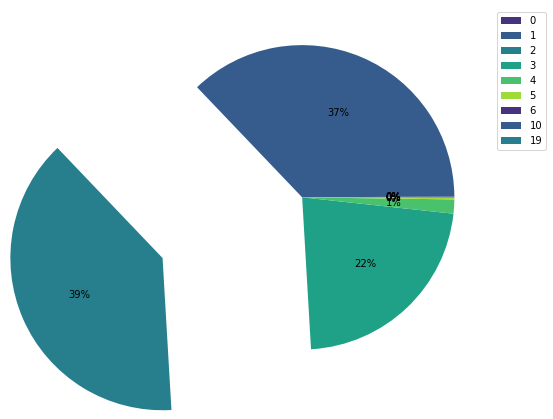

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

# Инициализация данных
data = df[['Rooms', 'Id']].groupby('Rooms').count()
data['Explode'] = np.where(data.Id == data.Id.max(), 1, 0)

# Настройка цветовой гаммы
colors = sns.color_palette('viridis')

# Рендеринг круговой диаграммы
plt.pie(data.Id, explode=data.Explode,  colors = colors, autopct='%.0f%%')
ax.legend(labels = data.index, loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()


# #2

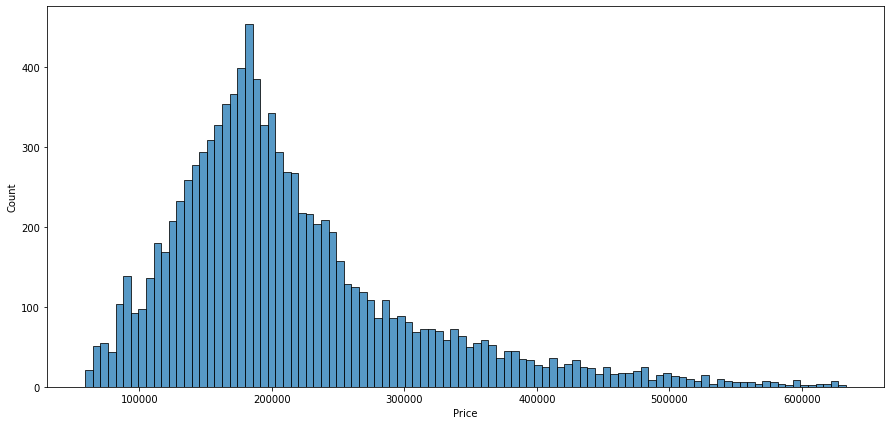

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df.Price, bins = 100)

In [ ]:
df['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1910           1
1916           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

# #3

In [ ]:
df = df.query("HouseYear != 20052011")
df = df.query("HouseYear != 4968")

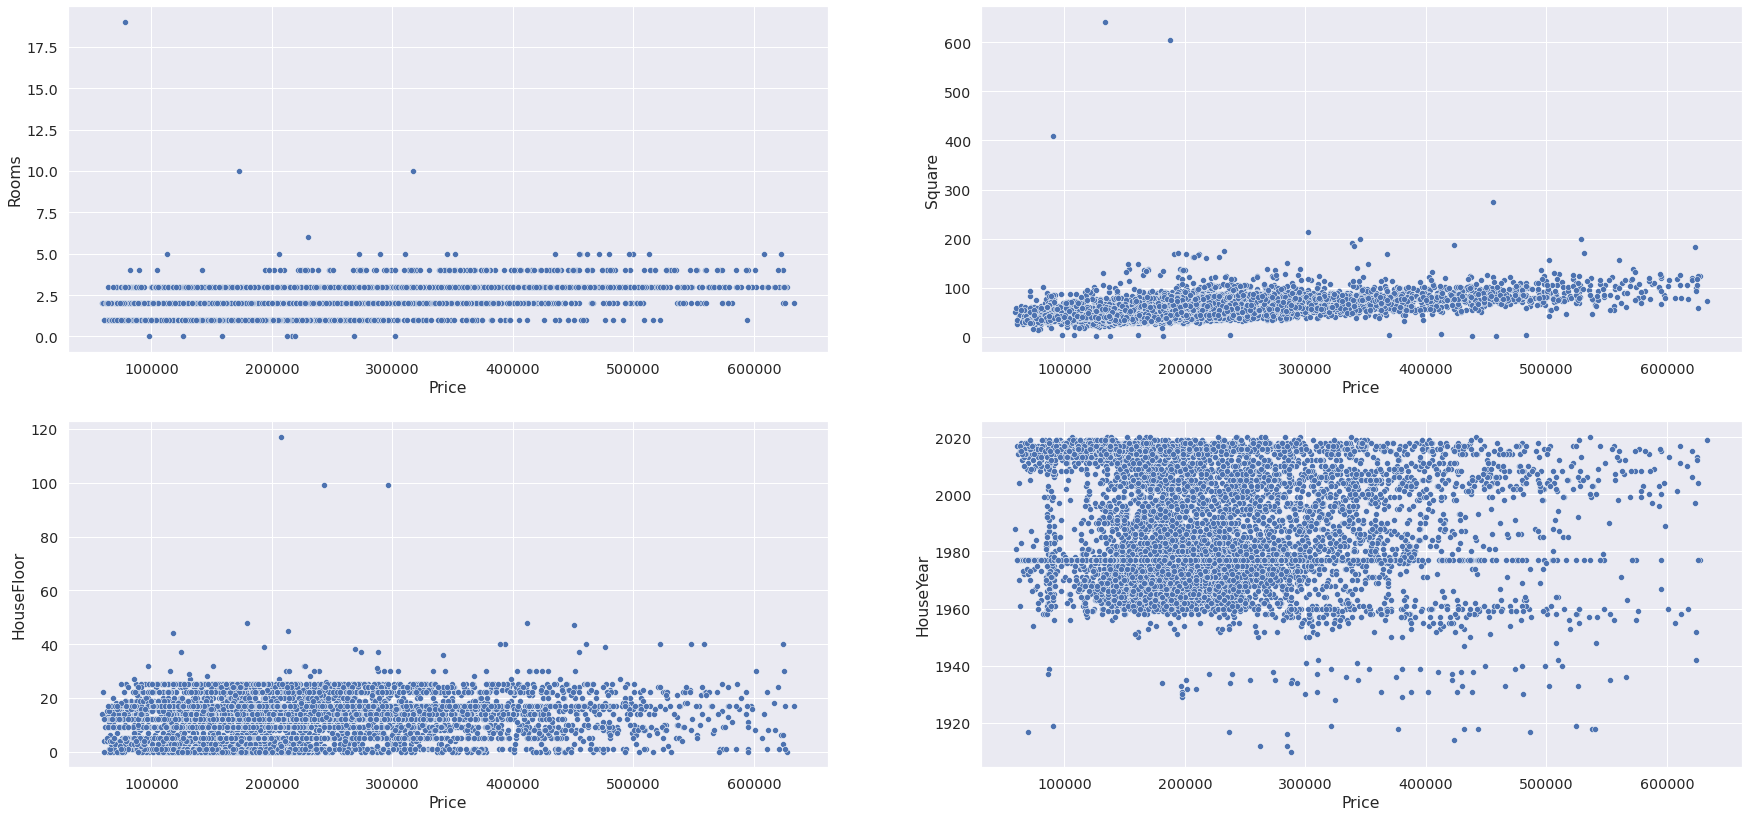

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))
sns.set(font_scale=1.3)

plt.subplot(2, 2, 1)
sns.scatterplot(
    x='Price', 
    y='Rooms', 
    data=df)

plt.subplot(2, 2, 2)
sns.scatterplot(
    x='Price', 
    y='Square', 
    data=df)

plt.subplot(2, 2, 3)
sns.scatterplot(
    x='Price', 
    y='HouseFloor', 
    data=df)

plt.subplot(2, 2, 4)
sns.scatterplot(
    x='Price', 
    y='HouseYear', 
    data=df)



# #4

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


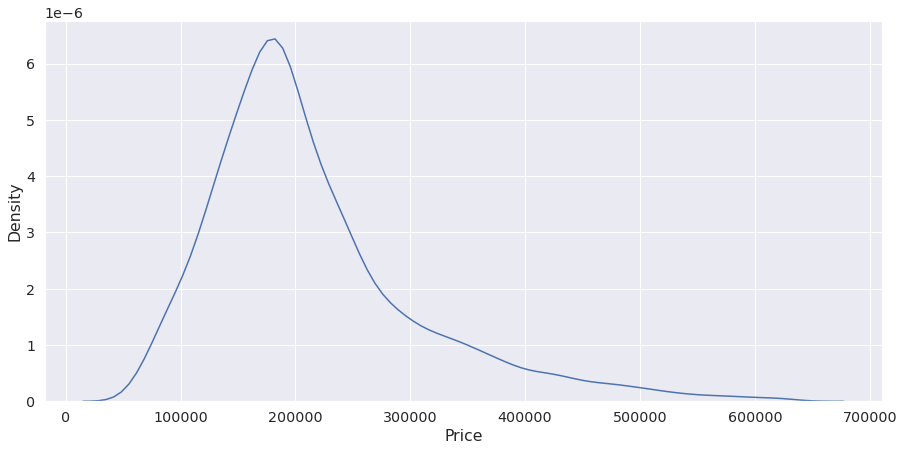

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.3)
sns.kdeplot(df.Price, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: The `data2` param is now named `y`; please update your code
  warnings.warn(msg, FutureWarning)


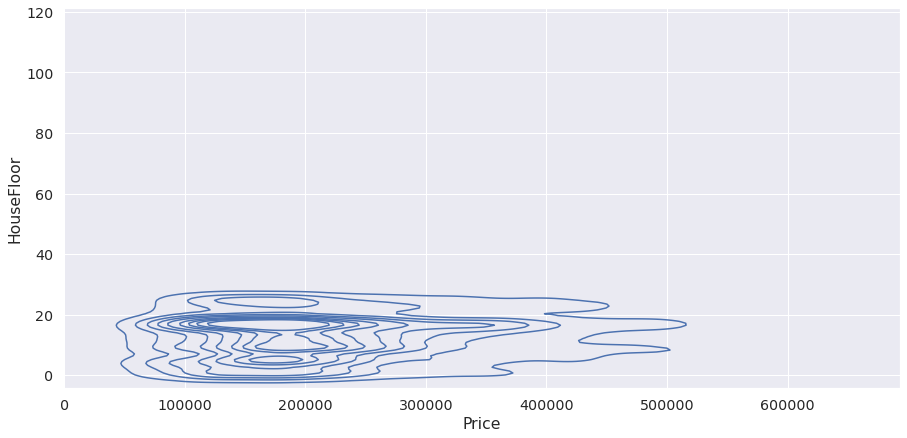

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.set(font_scale=1.3)
sns.kdeplot(df.Price, data2=df.HouseFloor)#, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True)

# #5

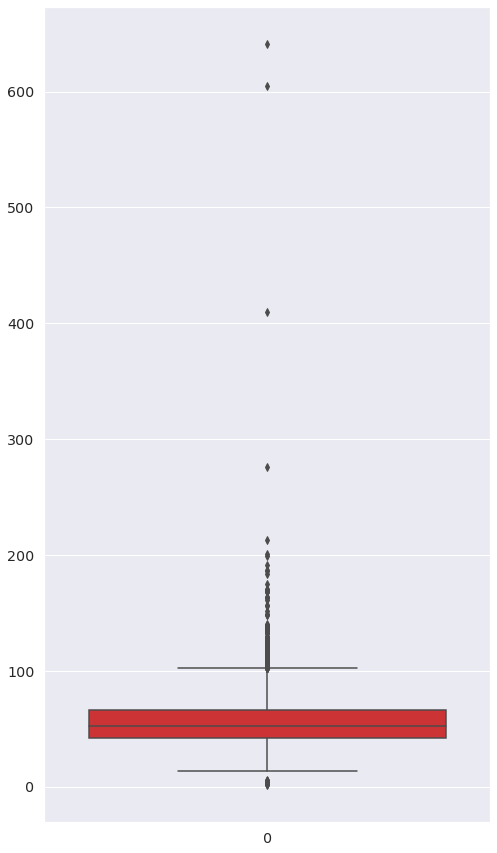

In [ ]:
plt.figure(figsize=(8, 15))
sns.boxplot(data=df.Square, palette='Set1');

# #6


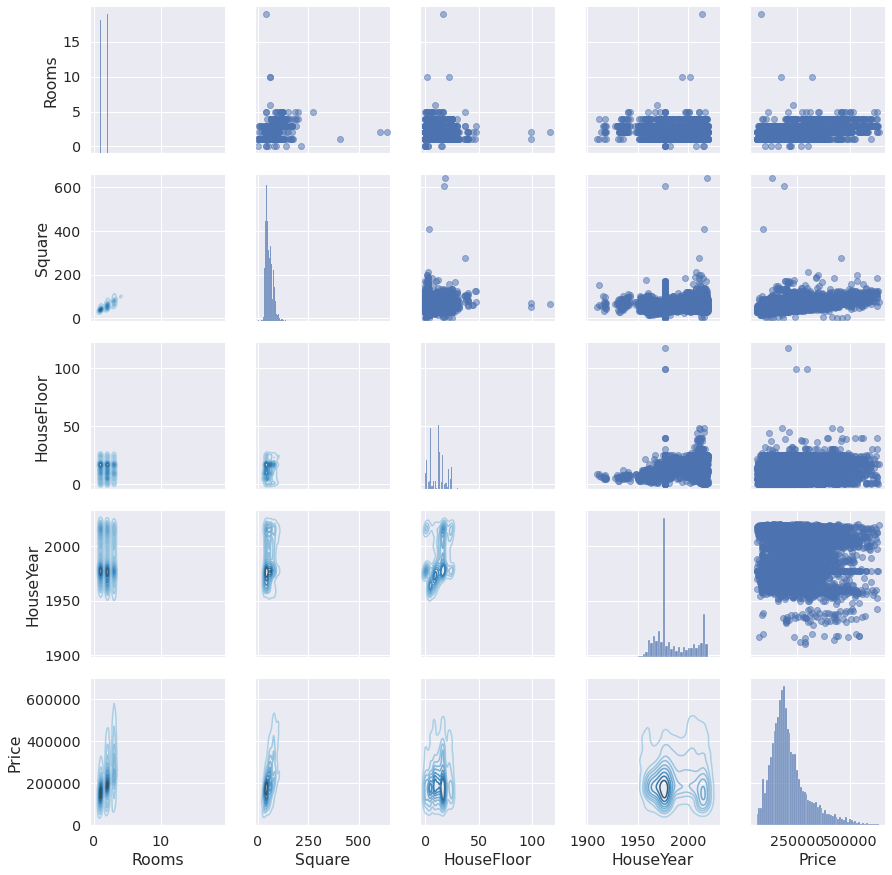

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.3)

g = sns.PairGrid(df[['Rooms', 'Square', 'HouseFloor', 'HouseYear', 'Price']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.histplot);

# #7


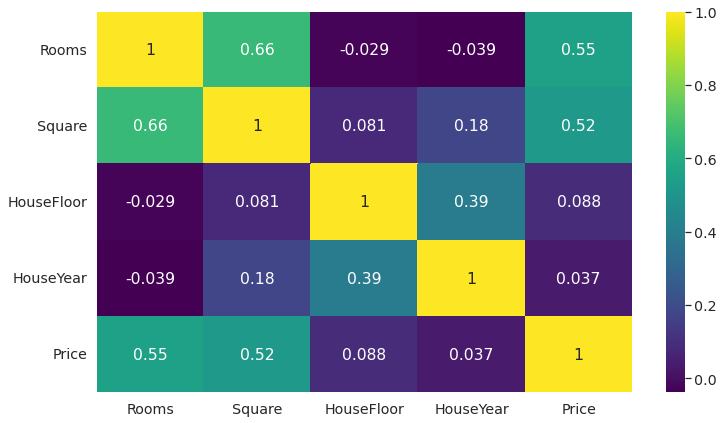

In [ ]:
sns.set(font_scale=1.3)

f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df[['Rooms', 'Square', 'HouseFloor', 'HouseYear', 'Price']].corr(), annot=True,  ax=ax, cmap="viridis")
#plt.ylim((0, 12))